# Logistic Regression with a neutral network mindset

Welcome to hour first(reqiured) programming assignment! you will build a logistic regression classifier to recognize cats. This assignment will step you through how to do this with a Neutral network mindset, and will also hone your intuitions about deep learning. 

* you will learn to: *
- Build the general architechture of a learning algorithm, including: 
    - Initializing the cost function and its gradient
    - Calculating the cost functionand its gradient 
    - Using an optimization algorithm (gradient descent)
- Gather all three functions above into a main model function, in the right order.  

## Step1,  Packages

First, let's run the cell below to import all the packages that you will need during this assgiment
1. numpy: is the fundamental package for scientific computing with Python 
2. h5py: is a common package to interact with a dataset that is stored on an H5 file.  
3. matplotlib: is a famous library to plot graphs in python
4. PIL and scipy:  are used here to test your model with your own picture at the end.  

In [1]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset
from public_tests import *

%matplotlib inline 
%load_ext autoreload
%autoreload 2

## Step2 - Overview of the Problem set

Problem Statement: 
1. We added '_orig' at the end of image datasets (train and test) because we are going to preprocess them. After preprocessing, we will end up with train_set_x and test_set_x
2. Each line of your train_set_x and test_set_x is an array representing an image. You can visulize an example by runing the follow code. 
3. Many software bugs in deep learning come from having matrix/vector dimensions that don't fit.  If you can keep your matrix/vector dimensions straight you will go a long way toward eliminating many bugs. 
4. Here you must know numpy.squeeze() which is used to 

In [8]:
###  Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

y = [1], it's a 'cat' picture.


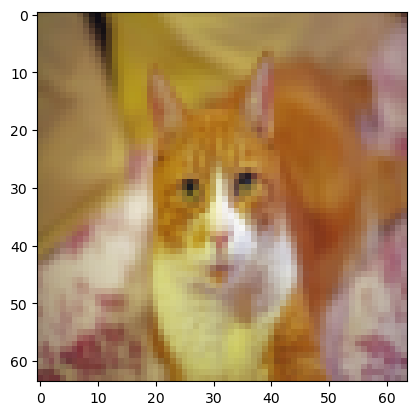

In [15]:
index = 24
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

## Exercise1

Find the values for: - m_train (number of training examples) - m_test (number of test examples) -num_px (=height=weight of a training image) Remember that train_set_x_orig is a numbpy-array of shape (m_train, num_px, num_px, 3). 

In [45]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]


print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


For convenience, you should now reshape images of shape (num_px, num_px, 3) in a numpy-arrary of shape (num_px * numpy*3, 1).After this, our training and test dateset is a numpy-arrary where each column represents a flattened image.  There should be m_train (respectively m_test) columns. 


## Exercise 2

Reshape the training and test data sets so that images of size (num_px, num_px, 3) are flattened into single vectors of shape (num_px * num_px * 3). 

A trick when you want to flattened a matrix X of (a, b, c, d) to a matrix X_flatten of shape (b$c$d, a) is to use:
X_flatten = X.reshape(X.shape[0], -1).T


In [51]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T

             

In [55]:
train_set_x_flatten[0:10, 1]

array([196, 192, 190, 193, 186, 182, 188, 179, 174, 213], dtype=uint8)

In [56]:

## CHECK that the first 10 pixels of the second image are in the correct place
assert np.alltrue(train_set_x_flatten[0:10,1] == [196, 192, 190, 193, 186, 182, 188, 179, 174, 213])
assert np.alltrue(test_set_x_flatten[0:10, 1] == [115, 110, 111, 137, 129, 129, 155, 146, 145, 159])

print(f'train_set_x_flatten shape: {str(train_set_x_flatten.shape)}')
print(f'train_set_y shape: {str(train_set_y.shape)}')
print(f'test_set_x_flatten shape: {str(test_set_x_flatten.shape)}')
print(f'test_set_y shape: {str(test_set_y.shape)}')


train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)


To represent color image,  the red, green and blue channels must be specified for each pixel, so the pixel value is  a vector of three numbers ranging from 0-255. 

One common preprosessing step in machine learning is to center and standardize your dataset, meaning that you substract the mean of the whole numpy arrary from each example., and then devide each example by the standard deviation of the whole numpy array.  But for picture datasets, it is simpler and more convenient and works almost as well to just divide every row of the dataset by 255.  

In [57]:
### standardize ours dataset
train_set = train_set_x_flatten / 255
test_set = test_set_x_flatten / 255


<font color='blue'>
    
**what you need to remember**
    
Common steps for pre-processing a new dataset are:
- Figure out the dimensions and shapes of the problem
- Reshape the datasets such that each example is now a vector of size
- "Standardize" the data

## Step3 - General Architechture of the learning algorithm

It's time to design a simple algorithm to distinguish cat image from non-cat images. 

You will build a logistic Regression, using a neutral network mindset.  The following Figure explains why **logistic Regression is actually a very simple Neutral Network**

<font color='blue'>
PLEASE UNDERSTAND THE ALGORITHEM CLEARLY

**Key steps**: In this exercise, you will carry out the following steps: 
- Initialize the parameter of the model
- Learn the parameters for the model by minimizing the cost
- User the learned parameter to make prediction 
- Analyse the result and conclude

## Step4: Building the parts of our algorithm

The main steps for building a Neutral Network are:  
1. Define the model struture ( such as number of input features)
2. Initialize the model's parameters
3. Loop
    - Calculate current loss (forward propagation)
    - Calculate current gradient (backward propagation)
    - Update parameters (gradient descent)
    
You often build 1-3 sperately and integrate them into function we call model()



### 4.1 Sigmoid function

In [67]:
def sigmoid(z):
    """
    compute the sigmoid of z
    
    Arguments: 
    z -- A scalar or numpy array of any size where z should be an numpy array instead of a python list
    return:
    s -- sigmoid(z)
    """
    s = 1 / (1 + np.exp(-z))
    return s

In [69]:
print("sigmoid([0,2] = " + str(sigmoid(np.array([0,2]))))
sigmoid_test(sigmoid)

sigmoid([0,2] = [0.5        0.88079708]
All tests passed!


In [70]:
x = np.array([0.5, 0, 2.0])
output = sigmoid(x)
print(output)

[0.62245933 0.5        0.88079708]


### 4.2 Initializing parameters

**Exercise 4 - initialize with zeros**

Implement parameter initiaization in the cell below. You have to initialize w as a vector of zeros. 


In [81]:
def initialize_with_zeros(dim):
    """
    This  function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0
    Argument:
    dim -- size of the w vector we want
    
    Returns:
    w -- initialized vector of shape (w, 1)
    b -- initialized scalor 
    """
    w = np.zeros((dim, 1))
    b = 0.0
    return w, b

In [82]:
dim = 2
w, b = initialize_with_zeros(dim)

assert type(b) == float
print ("w = " + str(w))
print ("b = " + str(b))

initialize_with_zeros_test_1(initialize_with_zeros)
initialize_with_zeros_test_2(initialize_with_zeros)


w = [[0.]
 [0.]]
b = 0.0
First test passed!
Second test passed!


### 4.3 Forward and backward propagation

Now that your parameters are initialized, you can do the "forward" and "backward" propagation steps for learning the parameters. 

**Exercise5 - propagate**

Implement a function `propagate()` that computes the cost function and its gradient

Hints:

Forward Propagation:


In [110]:
# Graded Function: propagate
def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above
    Arguments:
    w -- weights, a numpy arrary of size (num_px*num_px*3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)
    
    Return:
    grads -- dictionary containing the gradients of the weights and bias)
        (dw -- gradient of the loss with respect to w, thus same as shape as w)
        (db -- grandient of the loss with respect to b, thus same as shape as b)
    cost -- negative log-likelihood cost for logistic regression
    
    """
    
        
    ## train set size
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    #(≈ 2 lines of code)
    # compute activation
    # A = ...
    # compute cost by using np.dot to perform multiplication. 
    # And don't use loops for the sum.
    # cost = ...                                
    # YOUR CODE STARTS HERE
    Z = np.dot(w.T, X) + b
    A = 1 / (1+np.exp(-Z))
    cost  = np.mean(-(Y * np.log(A) + (1-Y) * np.log(1-A)))
    
    # YOUR CODE ENDS HERE

    # BACKWARD PROPAGATION (TO FIND GRAD)
    #(≈ 2 lines of code)
    # dw = ...
    # db = ...
    # YOUR CODE STARTS HERE
    dw = 1 / m * np.dot( X, (A - Y).T)
    db = 1 / m *  (np.sum(A - Y ))
    
    # YOUR CODE ENDS HERE
    cost = np.squeeze(np.array(cost))

    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost




In [115]:
w =  np.array([[1.], [2]])
b = 1.5

# X is using 3 examples, with 2 features each
# Each example is stacked column-wise
X = np.array([[1., -2., -1.], [3., 0.5, -3.2]])
Y = np.array([[1, 1, 0]])


grads, cost = propagate(w, b, X, Y)

assert type(grads["dw"]) == np.ndarray
assert grads["dw"].shape == (2, 1)
assert type(grads["db"]) == np.float64


print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

propagate_test(propagate)

dw = [[ 0.25071532]
 [-0.06604096]]
db = -0.1250040450043965
cost = 0.15900537707692405
All tests passed!


## 4.4 - Optimization

- You have initialized your parameters
- You are also able to compute a cost function and its gradient
- Now, you want to update the parameters using gradient descent. 

**Exercise 6- optimize** 

Write down the optimization function. The goal is to learn w and b by minimizing the cost function J. For a parameter O, the update rule is O = O - a dO, where a is the learning rate:


In [118]:
# GRADED FUNCTION: optimize

def optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)
    
    costs = []
    
    for i in range(num_iterations):
        # (≈ 1 lines of code)
        # Cost and gradient calculation 
        # grads, cost = ...
        # YOUR CODE STARTS HERE
        grads, cost = propagate(w, b, X, Y)
        
        # YOUR CODE ENDS HERE
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule (≈ 2 lines of code)
        # w = ...
        # b = ...
        # YOUR CODE STARTS HERE
        w -= learning_rate * dw
        b -= learning_rate * db
        
        # YOUR CODE ENDS HERE
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
            # Print the cost every 100 training iterations
            if print_cost:
                print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [120]:
params, grads, costs = optimize(w, b, X, Y, num_iterations=1000, learning_rate=0.009, print_cost=False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print("Costs = " + str(costs))

optimize_test(optimize)

w = [[0.16336373]
 [2.24983314]]
b = 1.9134213202286963
dw = [[ 0.04008976]
 [-0.01510353]]
db = -0.019404959588189174
Costs = [array(0.15900538), array(0.10541138), array(0.07681337), array(0.05976109), array(0.04867359), array(0.04097783), array(0.03536348), array(0.03110563), array(0.02777532), array(0.02510443)]
All tests passed!


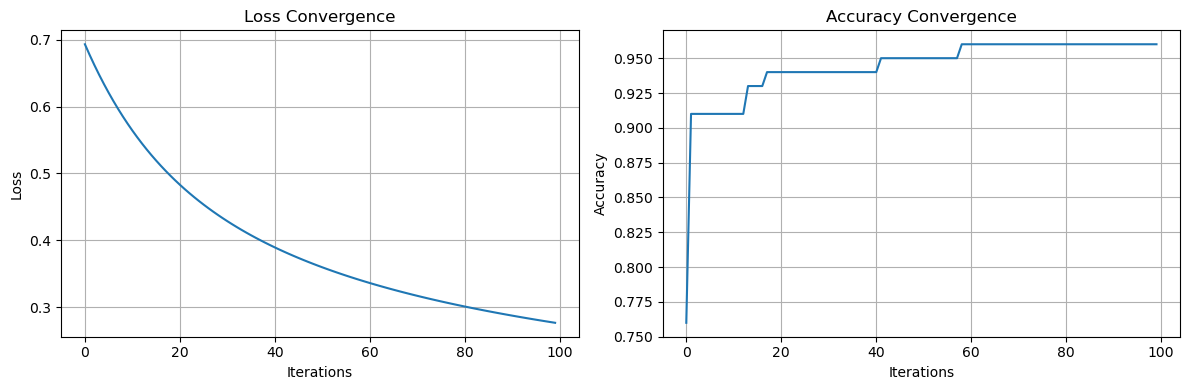

In [121]:
def visualize_convergence():
    """可视化梯度下降的收敛过程"""
    # 生成数据
    np.random.seed(42)
    X = np.random.randn(100, 1)
    y = (X > 0.5).astype(float)  # 简单的决策边界
    
    # 训练逻辑回归
    w, b = 0.0, 0.0
    learning_rate = 0.1
    losses = []
    accuracies = []
    
    for i in range(100):
        # 前向传播
        z = X * w + b
        a = 1 / (1 + np.exp(-z))
        
        # 计算损失和准确率
        loss = np.mean(-(y * np.log(a + 1e-15) + (1 - y) * np.log(1 - a + 1e-15)))
        predictions = (a > 0.5).astype(float)
        accuracy = np.mean(predictions == y)
        
        losses.append(loss)
        accuracies.append(accuracy)
        
        # 反向传播
        dz = a - y
        dw = np.mean(dz * X)
        db = np.mean(dz)
        
        # 更新参数
        w -= learning_rate * dw
        b -= learning_rate * db
    
    # 绘制损失和准确率曲线
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(losses)
    plt.title('Loss Convergence')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.grid(True)
    
    plt.subplot(1, 2, 2)
    plt.plot(accuracies)
    plt.title('Accuracy Convergence')
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

visualize_convergence()